In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/drive/MyDrive/customer_churn.csv')

In [6]:
pd.set_option("display.max_columns", None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data analysis**

In [8]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [13]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [14]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [15]:
print("The length of numerical variables: ", len(numerical_features))

The length of numerical variables:  3


In [16]:
#converting the type of feature 'TotalCharges' from object to numerical
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [17]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [18]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
print("The length of numerical variables: ", len(numerical_features))

The length of numerical variables:  4


In [26]:
data[numerical_features].nunique()

,0
SeniorCitizen,2
tenure,73
MonthlyCharges,1585
TotalCharges,6525


**so there are 2 discrete features namely 'SeniorCitizen' and 'tenure' & 2 continuous features namely MonthlyCharges and TotalCharges**




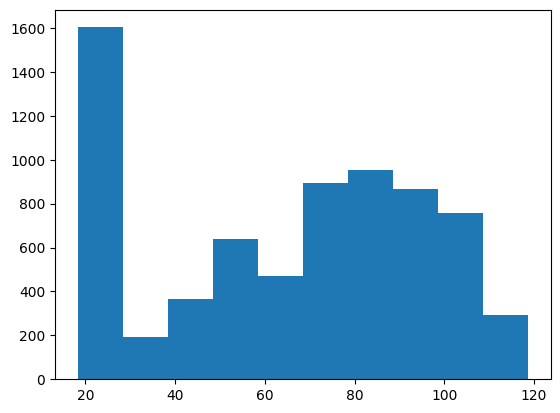

In [30]:
#checking the distribution of continuous features

plt.hist(data['MonthlyCharges'])
plt.show()

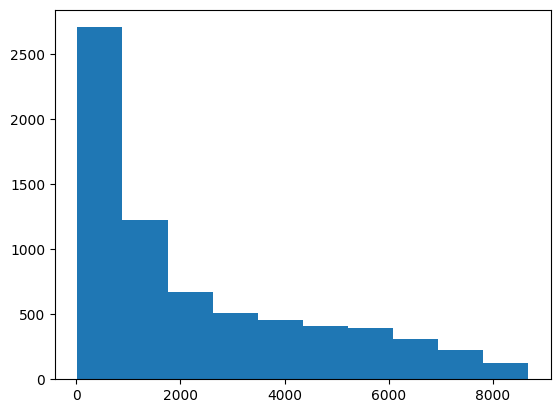

In [31]:
plt.hist(data['TotalCharges'])
plt.show()

**both are skewed distribution**

In [25]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [27]:
data[categorical_features].nunique()

,0
customerID,7043
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [29]:
#checking the cardinality of categorical features
for feature in categorical_features:
    print("The feature is {} and number of labels are {}".format(feature,len(data[feature].unique())))

The feature is customerID and number of labels are 7043
The feature is gender and number of labels are 2
The feature is Partner and number of labels are 2
The feature is Dependents and number of labels are 2
The feature is PhoneService and number of labels are 3
The feature is MultipleLines and number of labels are 4
The feature is InternetService and number of labels are 4
The feature is OnlineSecurity and number of labels are 4
The feature is OnlineBackup and number of labels are 4
The feature is DeviceProtection and number of labels are 4
The feature is TechSupport and number of labels are 4
The feature is StreamingTV and number of labels are 4
The feature is StreamingMovies and number of labels are 4
The feature is Contract and number of labels are 4
The feature is PaperlessBilling and number of labels are 3
The feature is PaymentMethod and number of labels are 5
The feature is Churn and number of labels are 2


**Bivariate analysis with the Target column 'Churn'**

Analysing the numerical columns with the target column

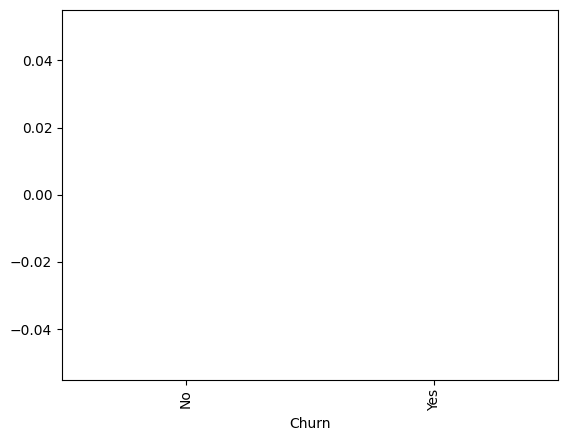

In [34]:
data.groupby('Churn')['SeniorCitizen'].median().plot.bar()
plt.show()

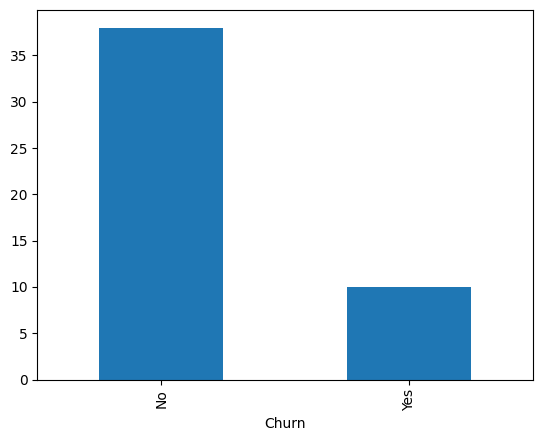

In [35]:
data.groupby('Churn')['tenure'].median().plot.bar()
plt.show()

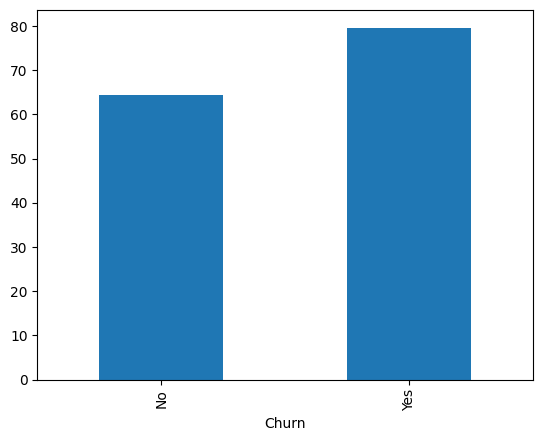

In [36]:
data.groupby('Churn')['MonthlyCharges'].median().plot.bar()
plt.show()

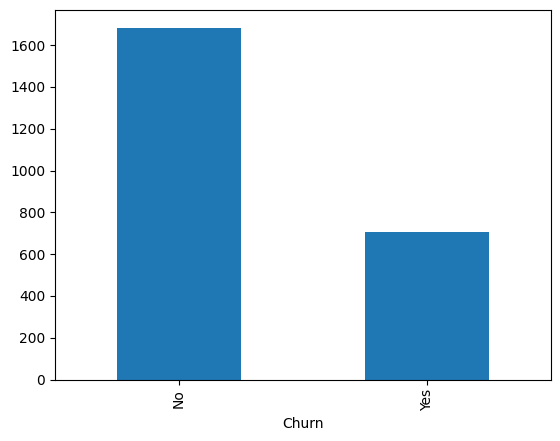

In [37]:
data.groupby('Churn')['TotalCharges'].median().plot.bar()
plt.show()


analysing the categorical features with the target column(for 2 categorical features, we use chi-square test)

In [39]:
for i in categorical_features:
    crosstab = pd.crosstab(data[i], data['Churn'],normalize='index')
    print(f"Crosstab for {i} and {'Churn'}:")
    print(crosstab)
    print('\n')

Crosstab for customerID and Churn:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0003-MKNFE  1.0  0.0
0004-TLHLJ  0.0  1.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
...         ...  ...
9987-LUTYD  1.0  0.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[7043 rows x 2 columns]


Crosstab for gender and Churn:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


Crosstab for Partner and Churn:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


Crosstab for Dependents and Churn:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


Crosstab for PhoneService and Churn:
Churn               No       Yes
PhoneService                    
No            0.751836  0.248164
Yes           0.732871  0.267129


Crosstab for MultipleLines and Churn:
Churn   

In [40]:
from scipy.stats import chi2_contingency
columns_to_test = categorical_features

for col in columns_to_test:

    crosstab = pd.crosstab(data[col], data['Churn'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    #  significance level (alpha)
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and Churn.")
    else:
        print(f"There is no statistically significant association between {col} and Churn.")
    print("-" * 20)

Chi-square test for customerID:
Chi2: 7043.0, p-value: 0.49439767459438705
There is no statistically significant association between customerID and Churn.
--------------------
Chi-square test for gender:
Chi2: 0.4840828822091383, p-value: 0.48657873605618596
There is no statistically significant association between gender and Churn.
--------------------
Chi-square test for Partner:
Chi2: 158.7333820309922, p-value: 2.1399113440759935e-36
There is a statistically significant association between Partner and Churn.
--------------------
Chi-square test for Dependents:
Chi2: 189.12924940423474, p-value: 4.9249216612154196e-43
There is a statistically significant association between Dependents and Churn.
--------------------
Chi-square test for PhoneService:
Chi2: 1.0396130268376393, p-value: 0.3079114887013313
There is no statistically significant association between PhoneService and Churn.
--------------------
Chi-square test for MultipleLines:
Chi2: 11.471561063206533, p-value: 0.00322836

Analysing the Target column 'Churn'

In [41]:
data['Churn'].head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [43]:
data['Churn'].dtypes

dtype('O')

In [44]:
data['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


<ipython-input-46-703146f9d474>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Churn'], palette="viridis")


<Axes: xlabel='Churn', ylabel='count'>

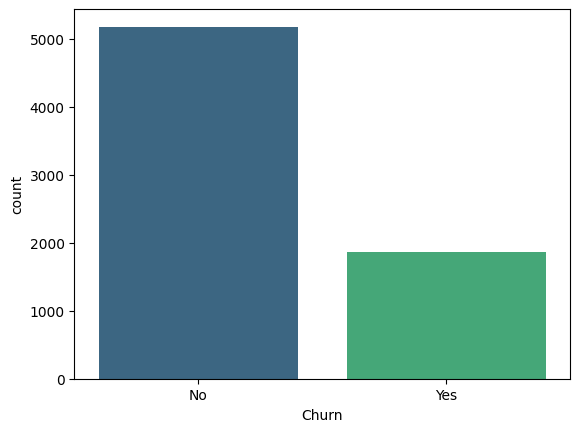

In [46]:
#countplot
sns.countplot(x=data['Churn'], palette="viridis")

**Data pre-processing**

In [47]:
#drop the column with all values are unique
data=data.drop('customerID', axis=1)

In [48]:
#drop the columns from categorical features which are not significantly related to the target column as per chi-square test
data=data.drop(['gender', 'PhoneService'], axis=1)

In [49]:
data.shape

(7043, 18)

In [50]:
data.isna().sum()

,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
MultipleLines,13
InternetService,37
OnlineSecurity,15
OnlineBackup,15
DeviceProtection,15
TechSupport,15


**handling missing values**

In [52]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [53]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']


In [68]:
for i in categorical_features:
  data[i]=data[i].fillna(data[i].mode()[0])

In [69]:
discrete_features=['SeniorCitizen', 'tenure']

In [71]:
for i in discrete_features:
    data[i]=data[i].fillna(data[i].mode()[0])

In [64]:
continuous_features=['MonthlyCharges', 'TotalCharges']

In [65]:
for i in [continuous_features]:
  data[i]=data[i].fillna(data[i].median())

In [72]:
data.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


**checking for outliers**

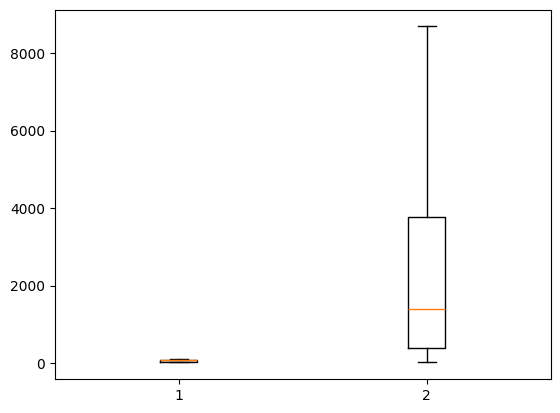

In [73]:
continuous_features=['MonthlyCharges', 'TotalCharges']
plt.boxplot(data[continuous_features])
plt.show()

There are no outliers

**ANOVA TEST to check the significance of numerical columns with the target column**

In [74]:
from scipy.stats import f_oneway

In [75]:
# Perform ANOVA test for each numerical column
numerical_columns = data.select_dtypes(include=np.number).columns
target_column = 'Churn'

anova_results = {}

for col in numerical_columns:
    # Group the numerical column by the target column
    grouped_data = [group[col].values for name, group in data.groupby('Churn')]

    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*grouped_data)
    anova_results[col] = {"F-Statistic": f_stat, "p-Value": p_value}

# Display results
for col, results in anova_results.items():
    print(f"ANOVA results for {col}:")
    print(f"  F-Statistic: {results['F-Statistic']:.4f}")
    print(f"  p-Value: {results['p-Value']:.4f}")
    print("  Significant?" + (" Yes" if results['p-Value'] < 0.05 else " No"))
    print()

ANOVA results for SeniorCitizen:
  F-Statistic: 161.4359
  p-Value: 0.0000
  Significant? Yes

ANOVA results for tenure:
  F-Statistic: 990.7878
  p-Value: 0.0000
  Significant? Yes

ANOVA results for MonthlyCharges:
  F-Statistic: 274.2158
  p-Value: 0.0000
  Significant? Yes

ANOVA results for TotalCharges:
  F-Statistic: 289.3833
  p-Value: 0.0000
  Significant? Yes



**so all numerical columns are significant.so we cannot drop any of them**

***Encoding***

In [76]:
categorical_features

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
for feature in categorical_features:
    le = LabelEncoder()
    data[feature]= le.fit_transform(data[feature])

In [79]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1,0,1.0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0.0,0,0,34.0,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0.0,0,0,2.0,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0.0,0,0,45.0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0.0,0,0,2.0,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**SMOTE(OVERSAMPLING) TO REMOVE IMBALNCE**

In [80]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the target column
x=data.drop(['Churn'],axis=1)
y=data['Churn']
smote = SMOTE(random_state=42)#sampling_strategy='minority'
X_resampled, y_resampled = smote.fit_resample(x, y)

# Show the resampled data
print("Resampled feature set (after SMOTE):")
print(X_resampled)
print("Resampled target:")
print(y_resampled)


Resampled feature set (after SMOTE):
       SeniorCitizen  Partner  Dependents     tenure  MultipleLines  \
0           0.000000        1           0   1.000000              1   
1           0.000000        0           0  34.000000              0   
2           0.000000        0           0   2.000000              0   
3           0.000000        0           0  45.000000              1   
4           0.000000        0           0   2.000000              0   
...              ...      ...         ...        ...            ...   
10343       0.000000        0           0   4.000000              0   
10344       0.767279        0           0   3.000000              0   
10345       0.000000        0           0   8.073334              0   
10346       0.516309        0           0   7.032618              0   
10347       0.684447        0           0  11.368893              0   

       InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                    0              

In [81]:
y_resampled.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


In [82]:
y_resampled.value_counts()

,count
Churn,
0,5174
1,5174


In [83]:
type(X_resampled)

pandas.core.frame.DataFrame

**apply scaling to oversampled data**

In [84]:
X_resampled.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [85]:
x1_resampled=X_resampled.drop(['Partner', 'Dependents','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod'],axis=1)

In [86]:
x1_resampled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
x1_resampled=scaler1.fit_transform(x1_resampled)

In [88]:
type(x1_resampled)

numpy.ndarray

In [89]:
x1_resampled=pd.DataFrame(x1_resampled)

In [90]:
x1_resampled.head()

,0,1,2,3
0,-0.517351,-1.116875,-1.343022,-0.927761
1,-0.517351,0.262303,-0.394200,-0.073705
2,-0.517351,-1.075081,-0.502737,-0.891801
3,-0.517351,0.722029,-0.907124,-0.096093
4,-0.517351,-1.075081,0.087214,-0.871823


In [91]:
x1_resampled.describe()

,0,1,2,3
count,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04
mean,-6.042497e-17,2.197272e-17,-6.591815e-17,8.239769e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-5.173506e-01,-1.158668e+00,-1.749160e+00,-9.328355e-01
25%,-5.173506e-01,-9.497015e-01,-7.832255e-01,-8.092738e-01
50%,-5.173506e-01,-2.584005e-01,2.377648e-01,-4.013516e-01
75%,-5.173506e-01,8.474091e-01,7.928796e-01,5.532264e-01
max,2.199018e+00,1.850448e+00,1.769535e+00,3.047080e+00


In [92]:
X_resampled=X_resampled.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)

In [93]:
x1_resampled.columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [94]:
X_resampled=pd.concat([X_resampled,x1_resampled],axis=1)

In [95]:
X_resampled.shape

(10348, 17)

In [96]:
X_resampled.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,2,0,0,0,0,0,1,2,-0.517351,-1.116875,-1.343022,-0.927761
1,0,0,0,0,2,0,2,0,0,0,1,0,3,-0.517351,0.262303,-0.394200,-0.073705
2,0,0,0,0,2,2,0,0,0,0,0,1,3,-0.517351,-1.075081,-0.502737,-0.891801
3,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.517351,0.722029,-0.907124,-0.096093
4,0,0,0,1,0,0,0,0,0,0,0,1,2,-0.517351,-1.075081,0.087214,-0.871823


**PCA for oversampled data**

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)


In [109]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=.97)
x_train_pca=pca1.fit_transform(x_train)
x_test_pca=pca1.transform(x_test)

In [110]:
x_train_pca.shape

(8278, 14)

In [111]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.30116111, 0.44485746, 0.52786752, 0.59918899, 0.66177564,
       0.70953792, 0.75563242, 0.79798952, 0.83565754, 0.87288275,
       0.9077292 , 0.93440308, 0.95395414, 0.97131534])

In [112]:
type(x_train_pca)

numpy.ndarray

In [113]:
x_train_pca=pd.DataFrame(data=x_train_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [114]:
x_train_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,-2.308166,1.615917,-0.189813,2.098711,0.962550,0.712869,-0.720961,-0.015475,0.296419,-0.234283,-0.326365,-0.777027,-0.281772,-0.540480
1,-1.406040,-2.117125,1.432200,0.660856,-0.211786,0.421097,0.290243,0.009188,-0.006716,0.047399,0.081783,0.343515,-0.536197,-0.160592
2,-1.687872,0.352629,0.215680,-0.637580,0.257811,-0.727134,0.854637,-0.058497,-0.409016,-0.435642,0.036269,0.359964,-0.133789,-0.697831
3,-2.314711,1.197677,-0.342890,0.997013,-0.283678,-0.535991,-0.165626,-0.017783,-0.330704,0.058968,-0.123015,0.596086,0.124547,0.316321
4,-0.194949,-0.828794,0.615002,0.307756,1.341039,-1.520414,0.893166,-0.931766,-0.793230,-0.849134,1.169954,-0.793087,-0.807569,-0.474401


**Modelling**

**modeling the pca oversampled data**

In [116]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [117]:
models={
    'lr':LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'nb':GaussianNB(),
    'dt':DecisionTreeClassifier(),
    'rf':RandomForestClassifier(),
    'svm':SVC(kernel='rbf'),
    'gb':GradientBoostingClassifier(),
    'xgb':XGBClassifier(),
    'ada':AdaBoostClassifier(),
    'lgbm':LGBMClassifier()
}

In [119]:
for name, model in models.items():
  model.fit(x_train_pca,y_train)
  print(name + ' trained')

lr trained
knn trained
nb trained
dt trained
rf trained
svm trained
gb trained
xgb trained
ada trained
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765
lgbm trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


lr accuracy_score: 0.81
lr precision_score: 0.79
lr recall_score: 0.84
lr f1_score: 0.81
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1021
           1       0.79      0.84      0.81      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.81      0.81      2070



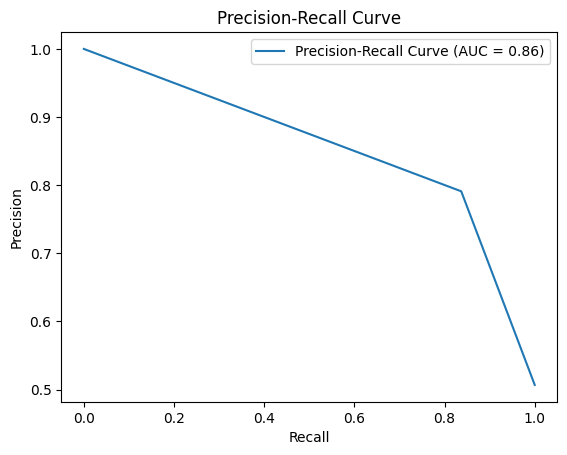

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


knn accuracy_score: 0.81
knn precision_score: 0.80
knn recall_score: 0.83
knn f1_score: 0.82
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.80      0.83      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



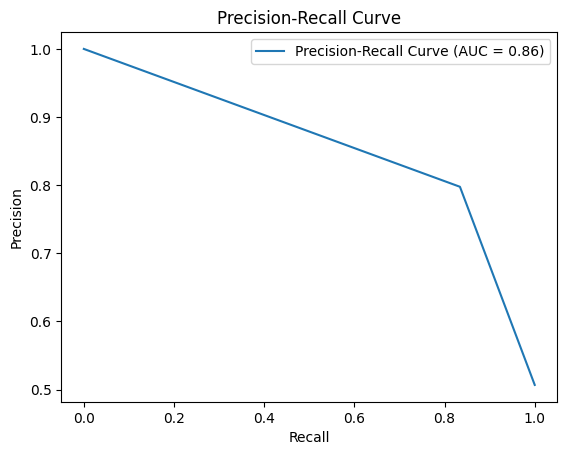

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


nb accuracy_score: 0.81
nb precision_score: 0.82
nb recall_score: 0.80
nb f1_score: 0.81
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1021
           1       0.82      0.80      0.81      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



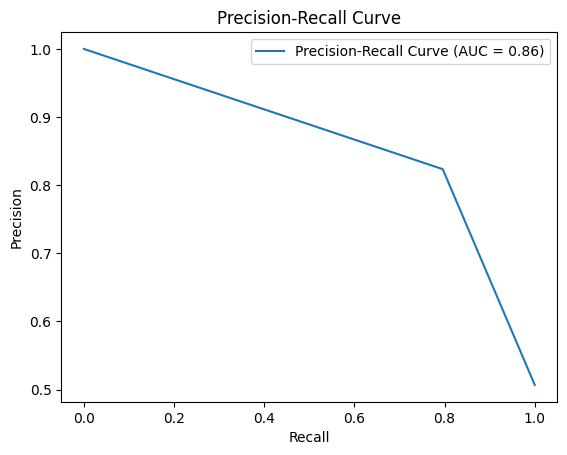

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


dt accuracy_score: 0.77
dt precision_score: 0.78
dt recall_score: 0.77
dt f1_score: 0.77
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1021
           1       0.78      0.77      0.77      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



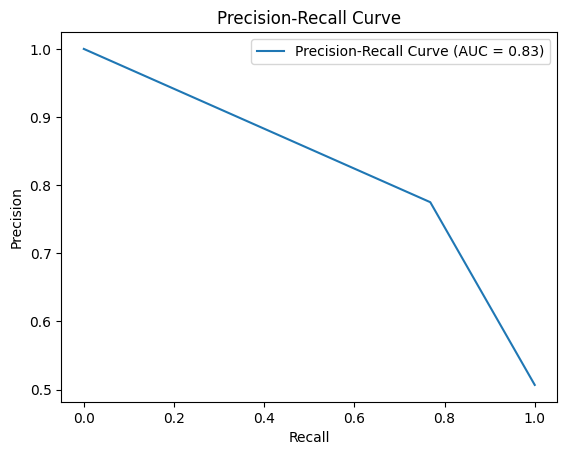

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


rf accuracy_score: 0.82
rf precision_score: 0.83
rf recall_score: 0.82
rf f1_score: 0.83
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1021
           1       0.83      0.82      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



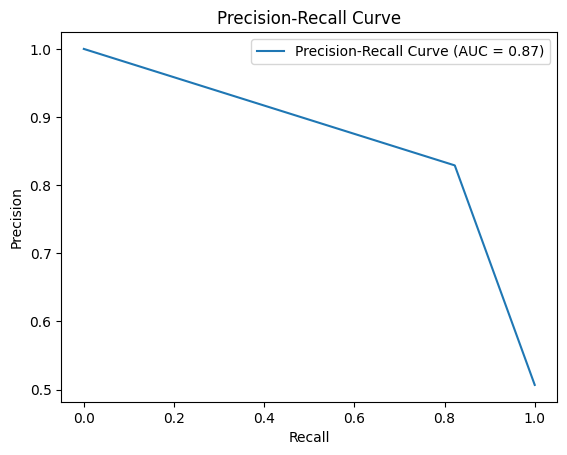

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


svm accuracy_score: 0.84
svm precision_score: 0.85
svm recall_score: 0.83
svm f1_score: 0.84
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1021
           1       0.85      0.83      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



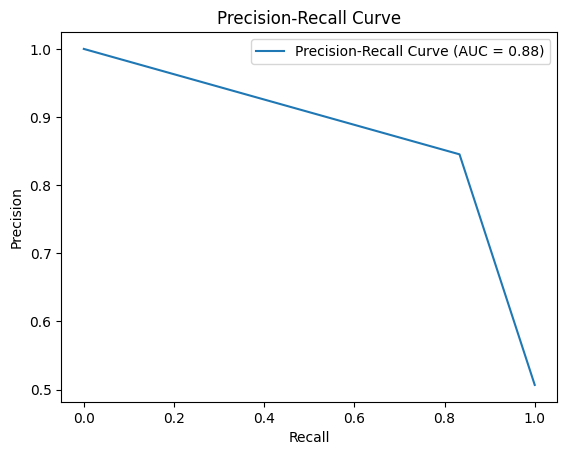

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


gb accuracy_score: 0.82
gb precision_score: 0.80
gb recall_score: 0.85
gb f1_score: 0.82
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1021
           1       0.80      0.85      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



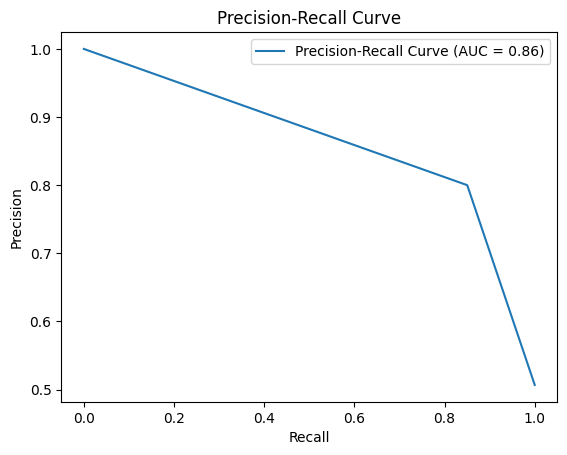

xgb accuracy_score: 0.82
xgb precision_score: 0.83
xgb recall_score: 0.83
xgb f1_score: 0.83
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1021
           1       0.83      0.83      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



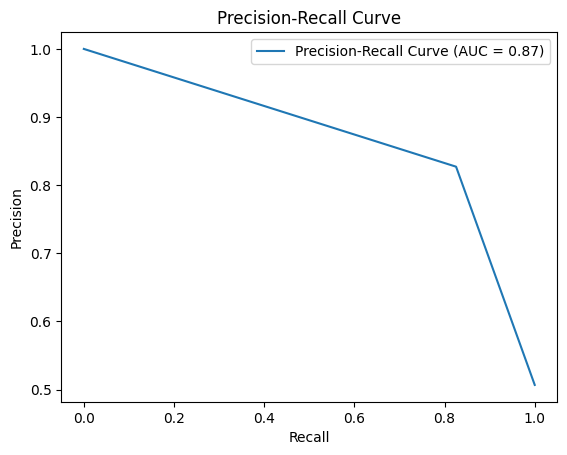

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


ada accuracy_score: 0.80
ada precision_score: 0.79
ada recall_score: 0.83
ada f1_score: 0.81
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



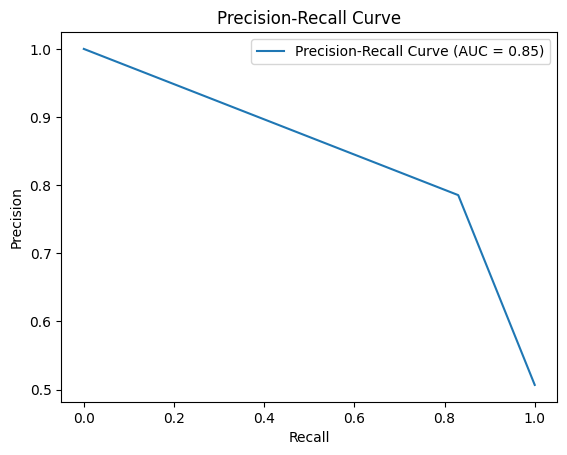

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


lgbm accuracy_score: 0.84
lgbm precision_score: 0.84
lgbm recall_score: 0.84
lgbm f1_score: 0.84
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1021
           1       0.84      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



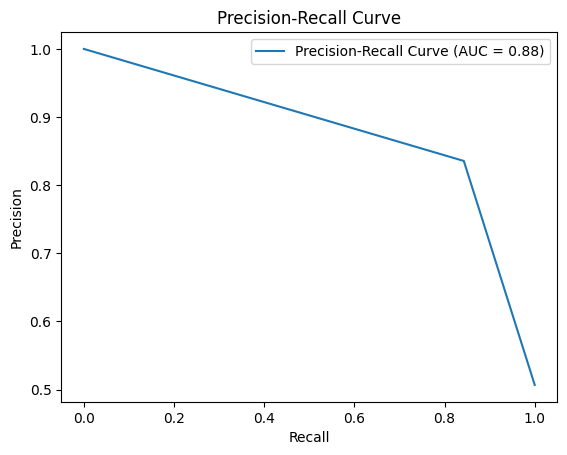

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

for name,model in models.items():
  y_pred = model.predict(x_test_pca)

  acc_score = accuracy_score(y_test,y_pred)
  prec_score = precision_score(y_test,y_pred)
  rec_score = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  pr_auc = auc(recall, precision)

  print(name + " accuracy_score: {:.2f}".format(acc_score))
  print(name + " precision_score: {:.2f}".format(prec_score))
  print(name + " recall_score: {:.2f}".format(rec_score))
  print(name + " f1_score: {:.2f}".format(f1))
  print(classification_report(y_test, y_pred))

  # Plot the Precision-Recall Curve
  plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

**checking svm with kernal linear also  pca oversampled data**

In [126]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train_pca,y_train)
y_pred=svm.predict(x_test_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics


lgbm accuracy_score: 0.81
lgbm precision_score: 0.78
lgbm recall_score: 0.86
lgbm f1_score: 0.82
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1021
           1       0.78      0.86      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



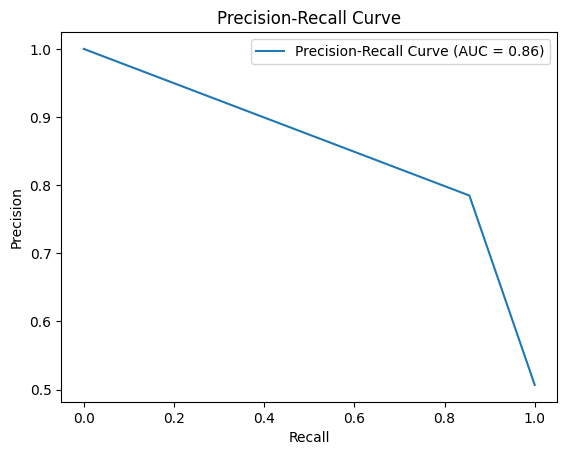

In [129]:
  acc_score = accuracy_score(y_test,y_pred)
  prec_score = precision_score(y_test,y_pred)
  rec_score = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  pr_auc = auc(recall, precision)

  print(name + " accuracy_score: {:.2f}".format(acc_score))
  print(name + " precision_score: {:.2f}".format(prec_score))
  print(name + " recall_score: {:.2f}".format(rec_score))
  print(name + " f1_score: {:.2f}".format(f1))
  print(classification_report(y_test, y_pred))

  # Plot the Precision-Recall Curve
  plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

for pca oversampled data,we got lightgbm and svm(kernal=rbf) as the best models

**modelling the oversampled data before doing pca**

In [130]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [131]:
models={
    'lr':LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'nb':GaussianNB(),
    'dt':DecisionTreeClassifier(),
    'rf':RandomForestClassifier(),
    'svm':SVC(kernel='rbf'),
    'gb':GradientBoostingClassifier(),
    'xgb':XGBClassifier(),
    'ada':AdaBoostClassifier(),
    'lgbm':LGBMClassifier()
}

In [133]:
for name, model in models.items():
  model.fit(x_train,y_train)
  print(name + ' trained')

lr trained
knn trained
nb trained
dt trained
rf trained
svm trained
gb trained
xgb trained
ada trained
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765
lgbm trained


lr accuracy_score: 0.81
lr precision_score: 0.79
lr recall_score: 0.85
lr f1_score: 0.82
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1021
           1       0.79      0.85      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



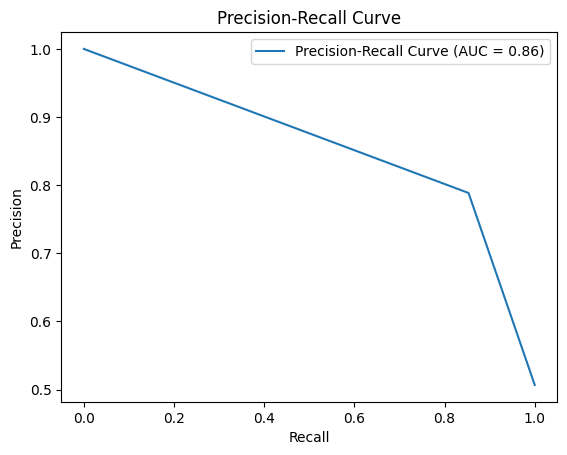

knn accuracy_score: 0.81
knn precision_score: 0.79
knn recall_score: 0.85
knn f1_score: 0.82
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1021
           1       0.79      0.85      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



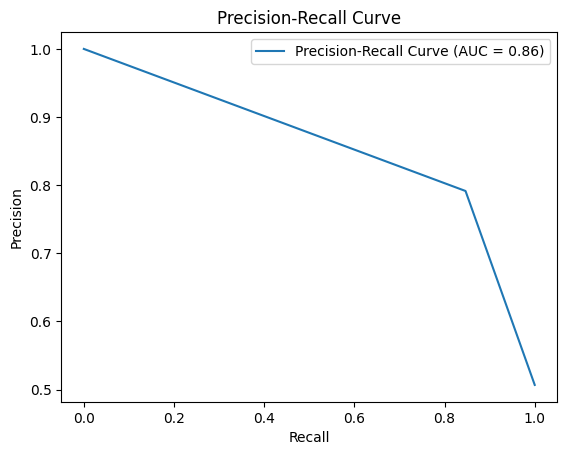

nb accuracy_score: 0.79
nb precision_score: 0.78
nb recall_score: 0.82
nb f1_score: 0.80
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1021
           1       0.78      0.82      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



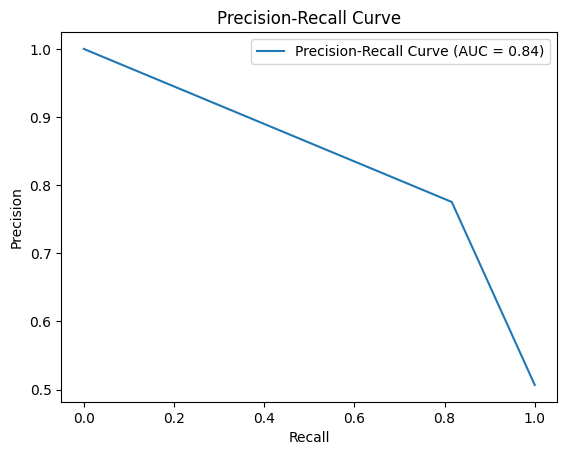

dt accuracy_score: 0.80
dt precision_score: 0.81
dt recall_score: 0.81
dt f1_score: 0.81
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1021
           1       0.81      0.81      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



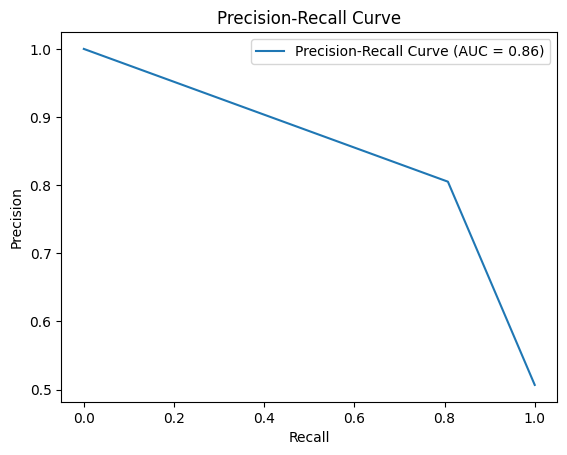

rf accuracy_score: 0.86
rf precision_score: 0.86
rf recall_score: 0.85
rf f1_score: 0.86
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



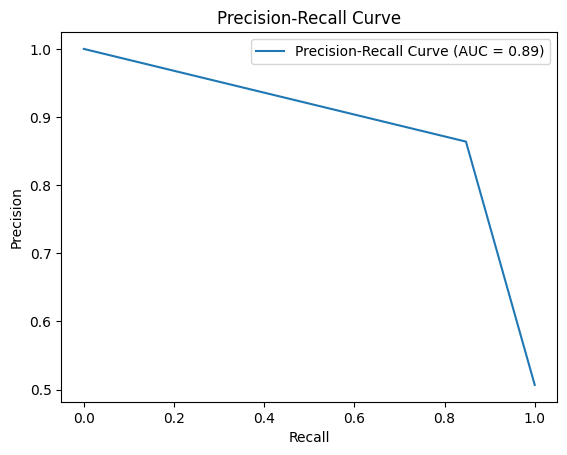

svm accuracy_score: 0.84
svm precision_score: 0.84
svm recall_score: 0.83
svm f1_score: 0.84
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1021
           1       0.84      0.83      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



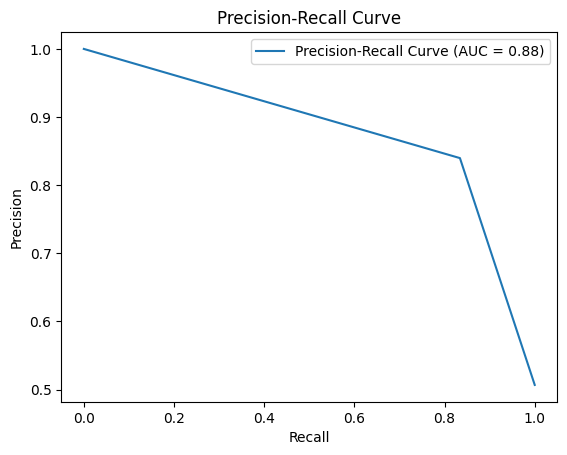

gb accuracy_score: 0.84
gb precision_score: 0.83
gb recall_score: 0.87
gb f1_score: 0.85
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



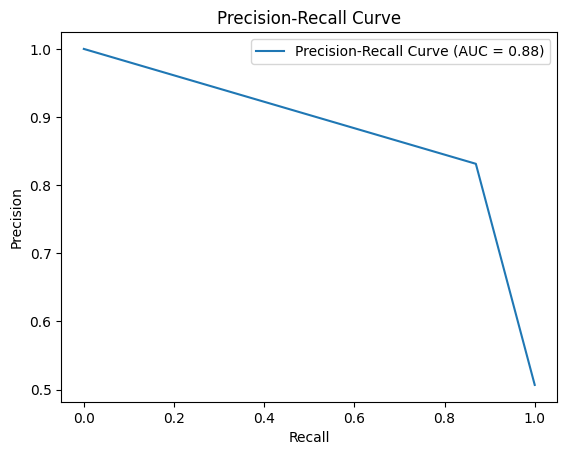

xgb accuracy_score: 0.84
xgb precision_score: 0.84
xgb recall_score: 0.84
xgb f1_score: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1021
           1       0.84      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



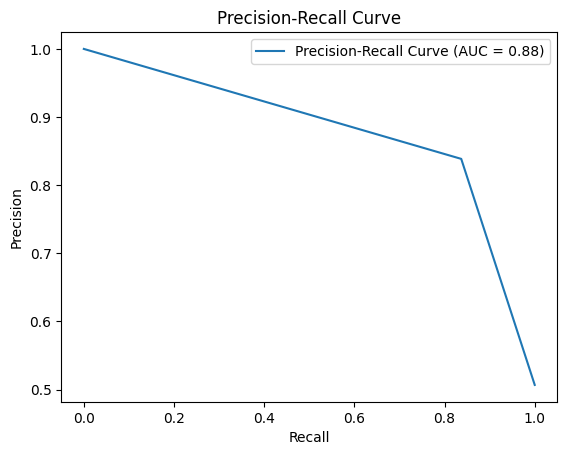

ada accuracy_score: 0.82
ada precision_score: 0.80
ada recall_score: 0.86
ada f1_score: 0.83
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1021
           1       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



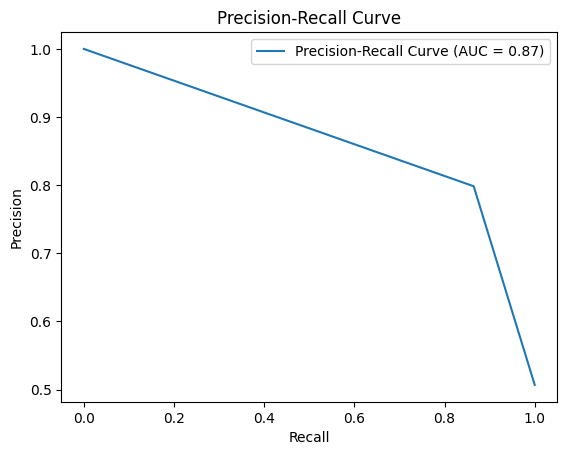

lgbm accuracy_score: 0.85
lgbm precision_score: 0.85
lgbm recall_score: 0.85
lgbm f1_score: 0.85
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.85      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



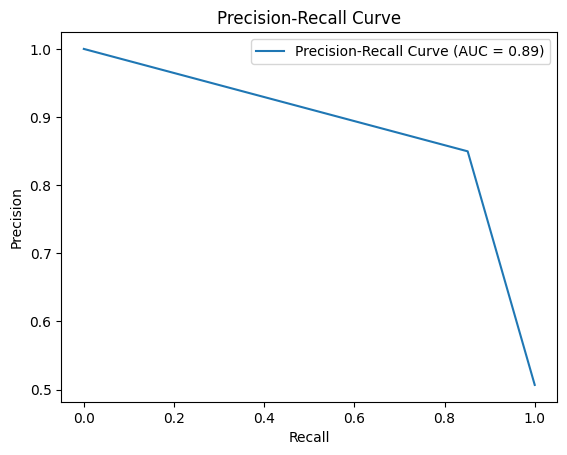

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

for name,model in models.items():
  y_pred = model.predict(x_test)

  acc_score = accuracy_score(y_test,y_pred)
  prec_score = precision_score(y_test,y_pred)
  rec_score = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  pr_auc = auc(recall, precision)

  print(name + " accuracy_score: {:.2f}".format(acc_score))
  print(name + " precision_score: {:.2f}".format(prec_score))
  print(name + " recall_score: {:.2f}".format(rec_score))
  print(name + " f1_score: {:.2f}".format(f1))
  print(classification_report(y_test, y_pred))

  # Plot the Precision-Recall Curve
  plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

**after the evaluation of model, we came into a conclusion that the best model is Random Forest and modelling the oversampled data before doing PCA.***

**Hyperparameter tuning of Random Forest**

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
model = RandomForestClassifier(max_depth=30, n_estimators=200)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [144]:
y_pred = model.predict(x_test)

In [145]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.855072463768116
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



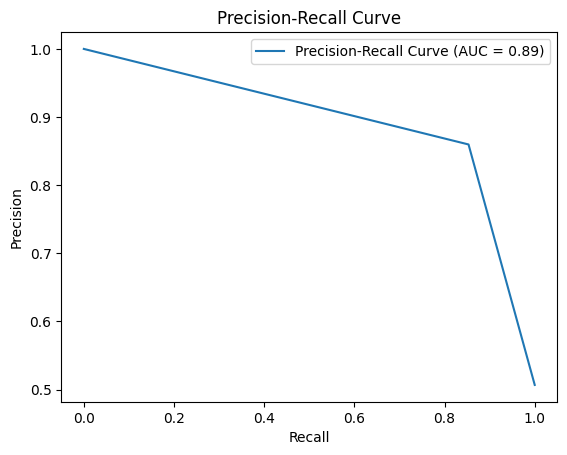

In [148]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


# Calculate AUC
pr_auc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [151]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [152]:
confusion_matrix(y_test,y_pred)

array([[875, 146],
       [154, 895]])

**For imbalanced data,we consider the AUC(PRECISION-RECALL CURVE) as the best matric.As per AUC, best model is Random forest(with hyperparameter tuning and in oversampled data without undergoing dimensionality reduction**